In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt

%load_ext line_profiler

In [2]:
population = 500
mutations = 0.005

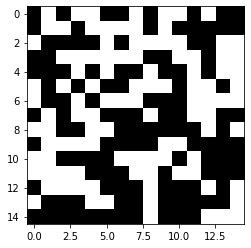

In [3]:
img = np.random.randint(2, size=(15,15))
plt.imshow(img, cmap=plt.cm.gray)  # use appropriate colormap here
plt.show()

In [4]:
def ga(img, population, mutations):

    rows = img.shape[0]
    columns = img.shape[1]

    mem = np.random.randint(2, size=(2 * population, rows, columns))

    def score(matrix1, matrix2):
        return (matrix1 == matrix2).sum()

    scores = np.zeros((2 * population))

    for i in range(100000000):

        for k, matrix in enumerate(mem):
            scores[k] = score(matrix, img)

        max_score = np.argmax(scores)

        if scores[max_score] == rows * columns:
            print(i)
            plt.imshow(mem[max_score], cmap=plt.cm.gray)  # use appropriate colormap here
            plt.show()
            break

        top_n_scores = np.argpartition(scores, -population)

        top = top_n_scores[-population:]
        bottom = top_n_scores[:-population]

        mid = rows//2

        for j in range(population):
            
            r = random.randrange(len(top))  
            idx = [r, (r+1)%len(top)]
            parents = [top[idx[0]],top[idx[1]]]
            
            mem[bottom[j]][0:mid] = mem[parents[0]][0:mid]
            mem[bottom[j]][-(mid+1):] = mem[parents[1]][-(mid+1):]

            idx = np.random.choice([0,1], p=[(1-mutations), mutations],size=(rows,columns))
            mem[bottom[j]] = abs(mem[bottom[j]] - idx)


152


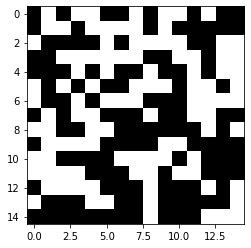

Timer unit: 1e-09 s

Total time: 3.02834 s
File: /tmp/ipykernel_20536/811191359.py
Function: ga at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def ga(img, population, mutations):
     2                                           
     3         1       5310.0   5310.0      0.0      rows = img.shape[0]
     4         1        631.0    631.0      0.0      columns = img.shape[1]
     5                                           
     6         1    2538850.0 2538850.0      0.1      mem = np.random.randint(2, size=(2 * population, rows, columns))
     7                                           
     8         1        912.0    912.0      0.0      def score(matrix1, matrix2):
     9                                                   return (matrix1 == matrix2).sum()
    10                                           
    11         1       6833.0   6833.0      0.0      scores = np.zeros((2 * population))
    12         

In [6]:
%lprun -f ga ga(img, population, mutations)